In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from stellarutil.simulation import Simulation
import numpy as np, matplotlib.pyplot as plt

# Step 1: Get the halo at index 0
m10r = Simulation(simulation_directory='../../data/m10r_res250md/')
halo = m10r.get_halo()
m10r.restrict_percentage(halo, 15)


def graph(x,y, title):
    # Calculate the line of best fit (regression line)
    slope, intercept = np.polyfit(x, y, 1)
    line_of_best_fit = slope * x + intercept
    # Create the scatter plot
    plt.scatter(x, y, label='Data Points')
    # Plot the line of best fit
    plt.plot(x, line_of_best_fit, color='red', label='Line of Best Fit')
    # Get the max and min value
    minVal = min(min(x), min(y))
    maxVal = max(max(x), max(y))
    # Plot y=x line
    plt.plot([minVal, maxVal], [minVal, maxVal], color='green', label='y = x')
    # Set x and y limits to be normalized
    plt.xlim(minVal, maxVal)
    plt.ylim(minVal, maxVal)
    # Add labels and legend
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.legend()
    # Show the plot
    plt.show()


Found AHF file here: ../../data/m10r_res250md/snapshot_600.AHF_halos

# in gizmo_analysis.gizmo_io.Read():
* reading header from:  data/m10r_res250md/output/snapdir_600/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 53886976 particles
    dark2     (id = 2): 2915328 particles
    gas       (id = 0): 53884363 particles
    star      (id = 4): 2586 particles
    blackhole (id = 5): 16524256 particles


# in utilities.simulation.Snapshot():
* reading:  data/m10r_res250md/snapshot_times.txt

  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  data/m10r_res250md/output/snapdir_600/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 53886976 particles
    dark2     (id = 2): 2915328 particles
    gas       (id = 0): 53884363 particles
    star      (id = 4): 2586 particles
    blackhole (id = 5): 16524256 particles

* reading the followi

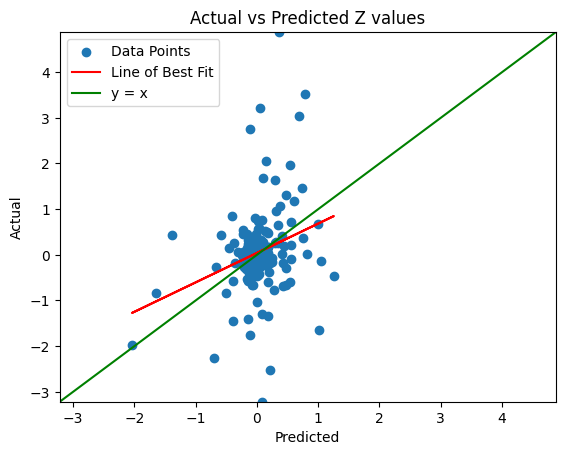

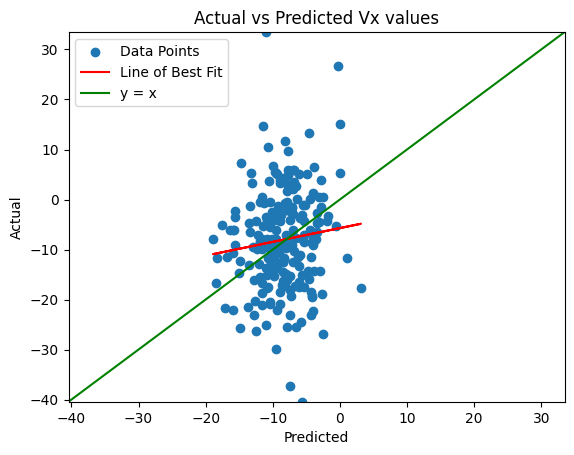

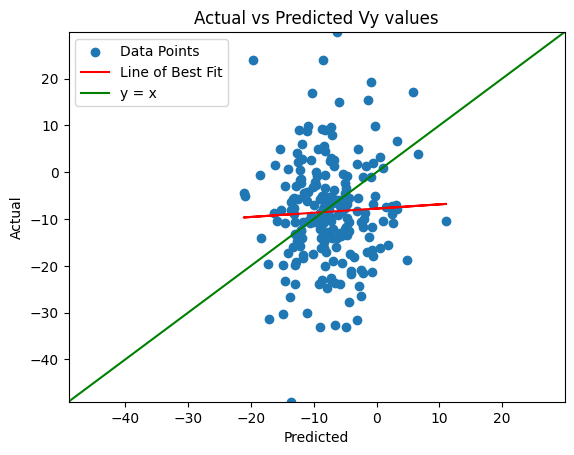

In [28]:
# Step 2: Prepare the data for training
X = []
y = []
for star in halo.stars:
    X.append([star.x, star.y, star.vz, star.a, star.get_2DR()])
    y.append([star.z, star.vx, star.vy])

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 4: Initialize and train the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
# Step 5: Predict on the test data
y_pred = knn_regressor.predict(X_test)
y_test = np.array(y_test) # Convert y_test to a NumPy array for multi-dimensional indexing

# Step 6 - Graph
graph(y_pred[:,0], y_test[:,0], "Actual vs Predicted Z values")
graph(y_pred[:,1], y_test[:,1], "Actual vs Predicted Vx values")
graph(y_pred[:,2], y_test[:,2], "Actual vs Predicted Vy values")
